# Capítulo 6: Probabilidad y Distribuciones

En este notebook exploraremos la distribución Gaussiana Multivariada, calculando su función de densidad de probabilidad (PDF) utilizando nuestra librería C++.

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Añadir ruta de build
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build/Release')))

import mathml_cpp

## 1. Validación Básica
Calcularemos la media y covarianza de un dataset simple.

In [3]:
data = np.array([
    [1.0, 2.0],
    [2.0, 3.0],
    [3.0, 4.0]
])

mean = mathml_cpp.probability.calculate_mean(data)
cov = mathml_cpp.probability.calculate_covariance(data)

print("Datos:\n", data)
print("\nMedia:", mean)
print("\nCovarianza:\n", cov)

# Verificacion con numpy
assert np.allclose(mean, np.mean(data, axis=0))
assert np.allclose(cov, np.cov(data, rowvar=False))

Datos:
 [[1. 2.]
 [2. 3.]
 [3. 4.]]

Media: [2. 3.]

Covarianza:
 [[1. 1.]
 [1. 1.]]


## 2. Visualización de la Gaussian Multivariada
Graficaremos los contornos de densidad para una distribución Gaussiana bivariada.

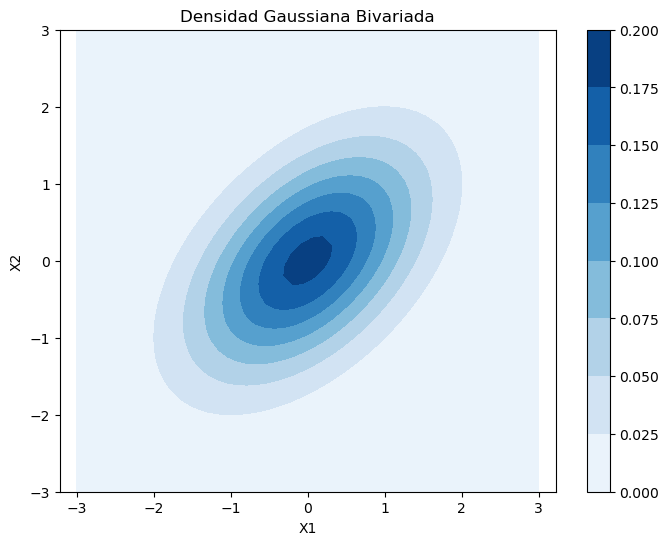

In [ ]:
mu = np.array([0.0, 0.0])
sigma = np.array([[1.0, 0.5], 
                  [0.5, 1.0]])

x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vec = np.array([X[i,j], Y[i,j]])
        # Llamada para evaluar la función de densidad de probabilidad (PDF)
        # para una distribución gaussiana multivariada
        Z[i,j] = mathml_cpp.probability.multivariate_gaussian_pdf(vec, mu, sigma)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, cmap='Blues')
plt.colorbar(contour)
plt.title("Densidad Gaussiana Bivariada")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.show()